# Worksheet 15

Name:  Junyi Li
UID: U13632870

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

OSError: [Errno 30] Read-only file system: 'temp.png'

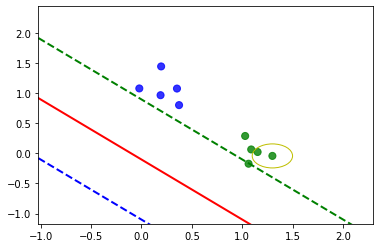

In [3]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import os

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05
expanding_rate = .99
retracting_rate = 1.1

def snap(x, w, b, error):
    xplot = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    # The equation for the decision boundary is w1*x1 + w2*x2 + b = 0
    # Solving for x2 in terms of x1: x2 = -(w1/w2)*x1 - (b/w2)
    svm = -(w[0]/w[1])*xplot - (b/w[1])
    # For the margin we have w1*x1 + w2*x2 + b = 1 for one side and w1*x1 + w2*x2 + b = -1 for the other
    left_svm = -(w[0]/w[1])*xplot - (b - 1)/w[1]
    right_svm = -(w[0]/w[1])*xplot - (b + 1)/w[1]

    cs = np.array(['g' if y == 1 else 'b' for y in Y])
    
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=cs, s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y', fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.open(TEMPFILE)

images = []
for epoch in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, X.shape[0])
    x, y = X[i], Y[i]
    error = y * (np.dot(w, x) + b) <= 0
    if error:
        # Update rule for perceptron
        w += alpha * y * x
        b += alpha * y
        alpha *= expanding_rate
    else:
        alpha /= retracting_rate
                    
    images.append(snap(x, w, b, error))

# Save the animation
images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

# Clean up temporary file
os.remove(TEMPFILE)


b) Consider the following dataset:

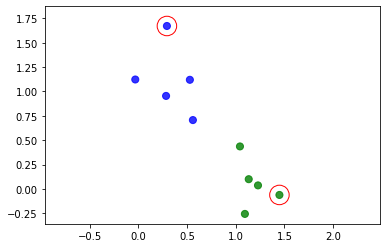

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

Moving a support vector across the decision boundary could result in a significant shift in the hyperplane, especially if the dataset is small. Moving a support vector further away from the decision boundary,the hyperplane might shift slightly to adjust to the new support vectors.Moving a support vector closer to the decision boundary, the SVM might adjust the hyperplane to increase the margin.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

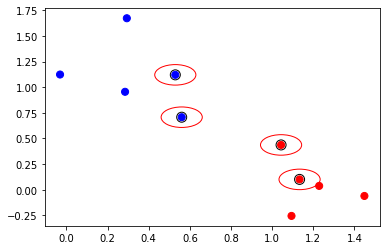

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate the dataset
centers = [[0, 1], [1, 0]]
X, _ = make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

# Fit the SVM
svm = SVC(kernel='linear')
svm.fit(X, Y)

# Get the support vectors
support_vectors = svm.support_vectors_

# Plot the points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='bwr')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# Circle the support vectors in red
ax = plt.gca()
for sv in support_vectors:
    ax.add_patch(plt.Circle(sv, 0.1, color='r', fill=False))

# Show the plot
plt.show()


